# FAMD with Matplotlib

In [1]:
import os
import pandas as pd
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")
# Chargement des données
D = pd.read_excel("Tennis_Players_AFDM.xlsx",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Edberg,187,droitier,une,41,36,6,finale,1
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4
Kuerten,190,droitier,une,20,9,3,vainqueur,38
Lendl,187,droitier,une,94,50,8,vainqueur,20


In [2]:
from scientisttools.decomposition import FAMD
#instaciation
afdm = FAMD(n_components = None,
            row_labels=list(D.index[:16]), #jusqu'à Wilander
            row_sup_labels=list(D.index[16:]), #à partir de Djokovic
            quanti_labels=['Taille','Titres','Finales','TitresGC'],
            quanti_sup_labels=['BestClassDouble'],
            quali_labels=['Lateralite','MainsRevers'],
            quali_sup_labels=['RolandGarros'],
            parallelize=False).fit(D)

## Scree plot

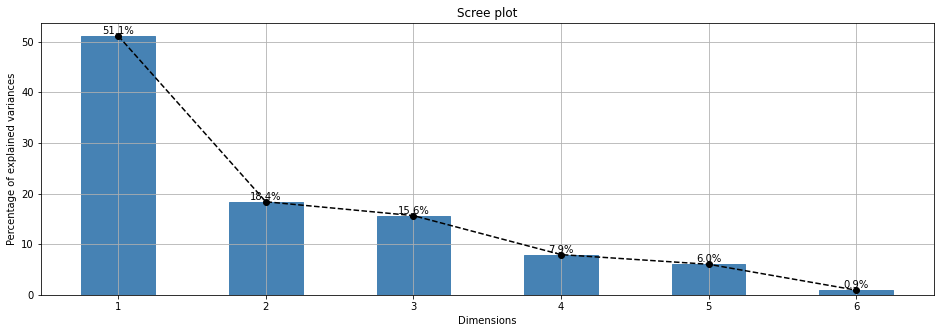

In [3]:
# Scree plot
from scientisttools.pyplot import plot_eigenvalues
import matplotlib.pyplot as plt
fig, axe = plt.subplots(figsize=(16,5))
plot_eigenvalues(afdm,choice="proportion",ax=axe,add_labels=True)
plt.show()

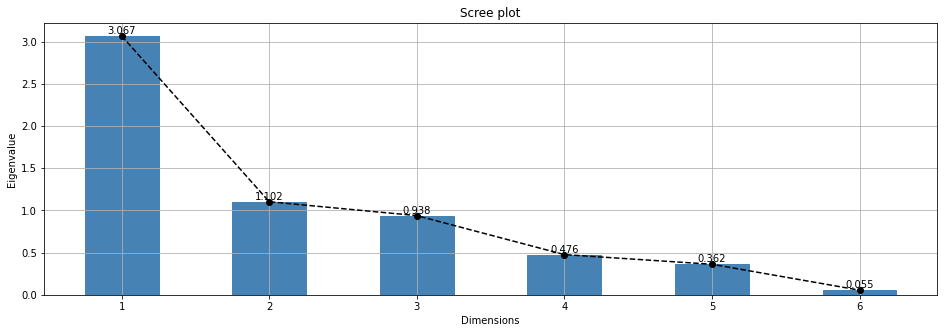

In [4]:
fig, axe = plt.subplots(figsize=(16,5))
plot_eigenvalues(afdm,choice="eigenvalue",ax=axe,add_labels=True)
plt.show()

## Individuals Factor Map - FAMD

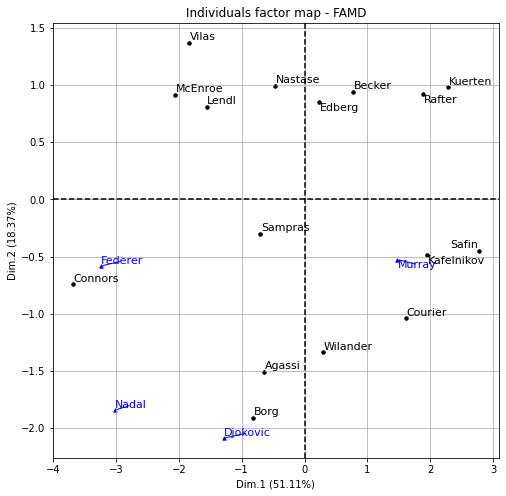

In [5]:
from scientisttools.pyplot import plot_famd_ind
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,repel=True)
plt.show()

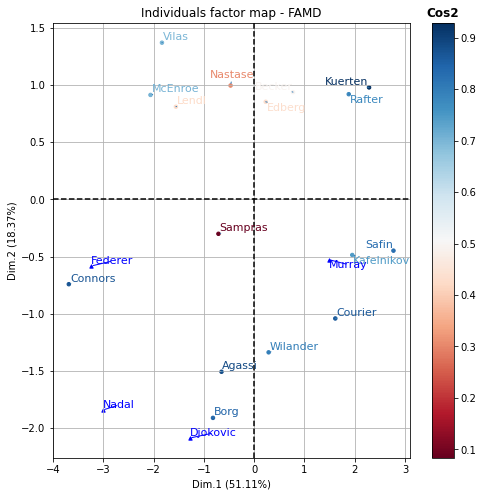

In [6]:
# Color with cos2
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,color="cos2",repel=True)
plt.show()

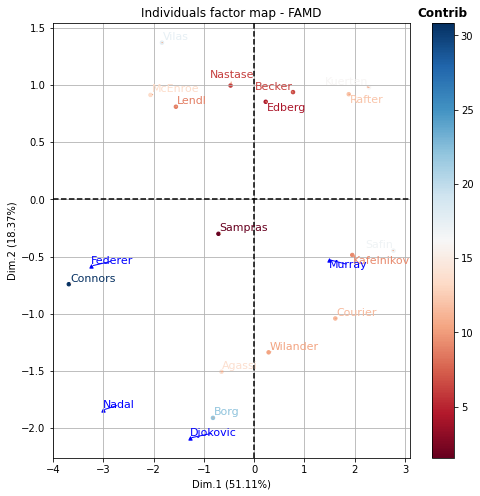

In [7]:
# Color with contrib
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,color="contrib",repel=True)
plt.show()

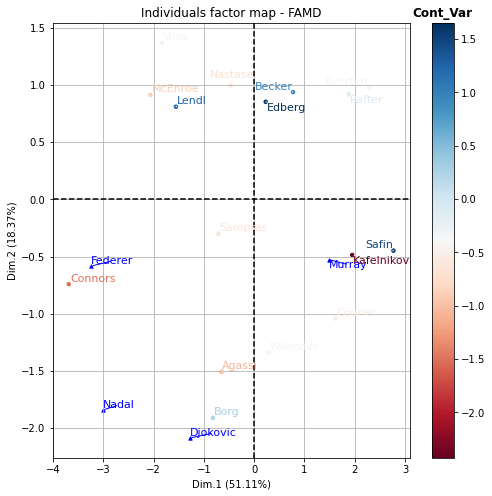

In [8]:
# Using  numpy color
import numpy as np
np.random.seed(123)
color_numpy = np.random.normal(size=16)
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,color=color_numpy,repel=True)
plt.show()

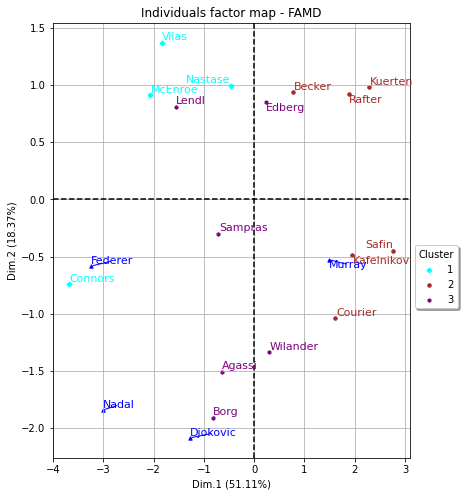

In [9]:
# Using KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,random_state=np.random.seed(123), n_init="auto").fit(afdm.row_coord_)
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,color=kmeans,repel=True)
plt.show()

#### With continous variables

##### Active continous variables

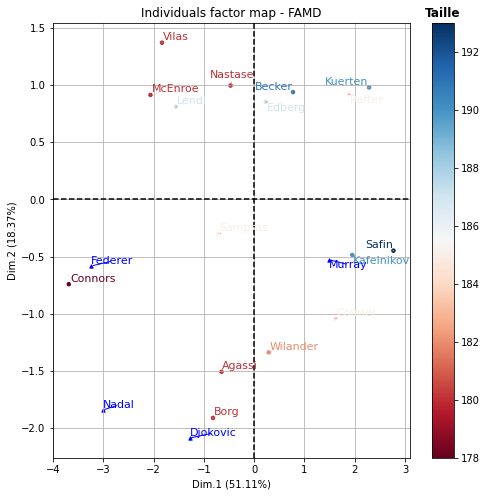

In [10]:
# With actives continuous variables
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,color="Taille",repel=True)
plt.show()

#### With supplementary continuous variables

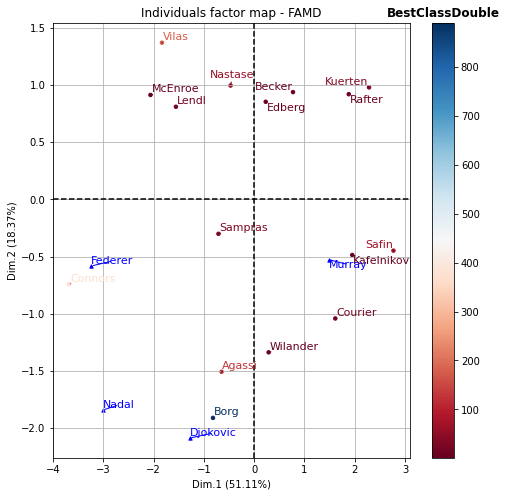

In [11]:
# With supplementary continuous variables
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,color="BestClassDouble",repel=True)
plt.show()

### Habillage

#### Active categories

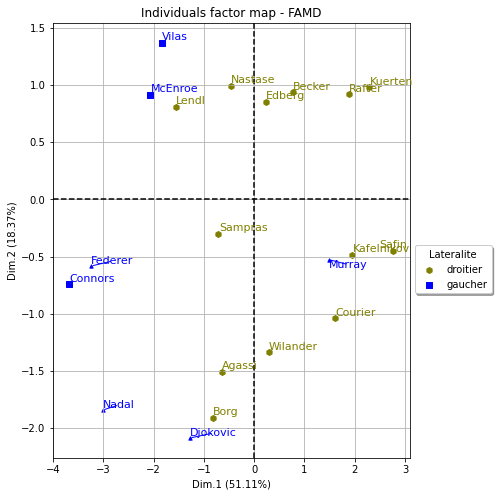

In [12]:
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,habillage="Lateralite",repel=True)
plt.show()

### Supplementary variables/categories

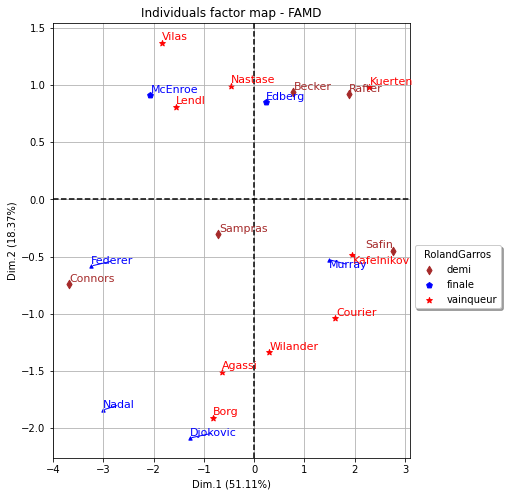

In [13]:
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_ind(afdm,habillage="RolandGarros",repel=True)
plt.show()

## Continuous variables plot

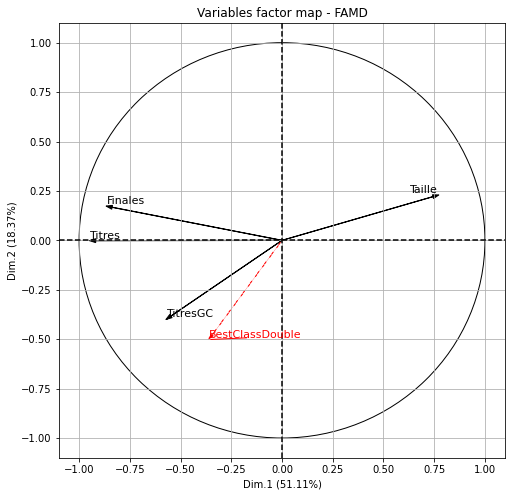

In [14]:
from scientisttools.pyplot import plot_famd_col
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_col(afdm,repel=True)
plt.show()

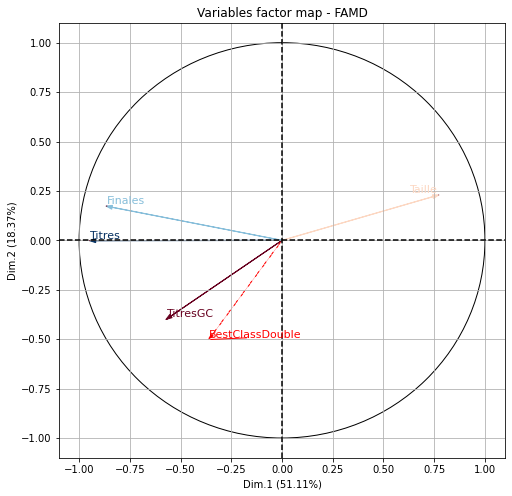

In [15]:
# Using cos2
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_col(afdm,color="cos2",repel=True)
plt.show()

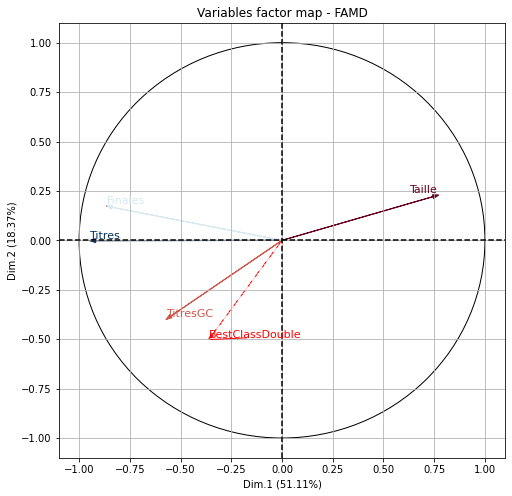

In [16]:
# Using contrib
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_col(afdm,color="contrib",repel=True)
plt.show()

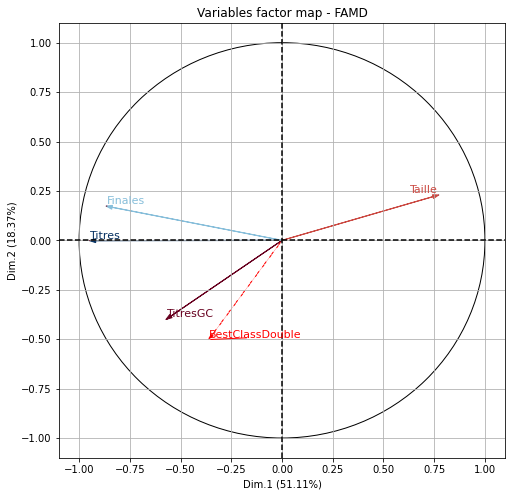

In [17]:
# Using numpy array
np.random.seed(123)
color_numpy = np.random.normal(size=4)
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_col(afdm,color=color_numpy,repel=True)
plt.show()

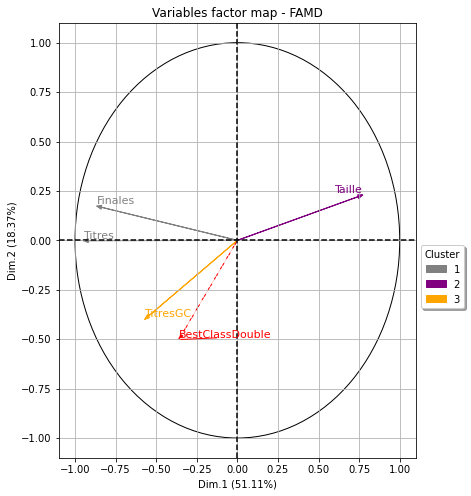

In [18]:
# Using Kmeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(afdm.col_coord_)
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_col(afdm,color=kmeans,repel=True)
plt.show()

## Variables Categories Factor Map - FAMD

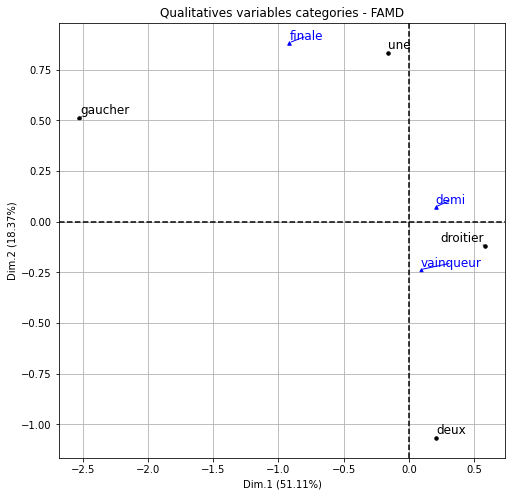

In [19]:
from scientisttools.pyplot import plot_famd_mod
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_mod(afdm,repel=True)
plt.show()

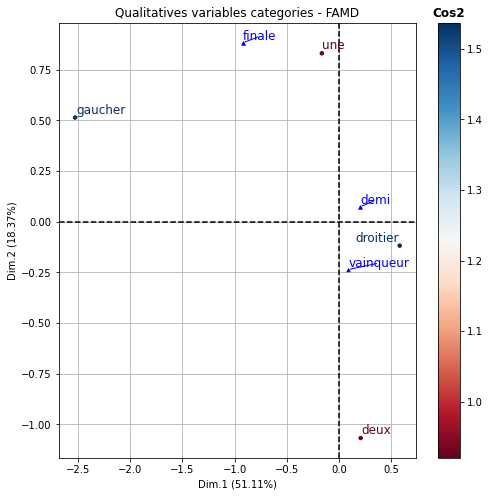

In [20]:
# Using cos2
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_mod(afdm,color="cos2",repel=True)
plt.show()

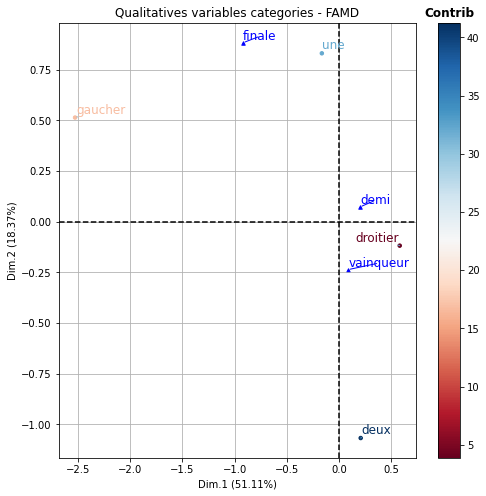

In [21]:
# Using contrib
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_mod(afdm,color="contrib",repel=True)
plt.show()

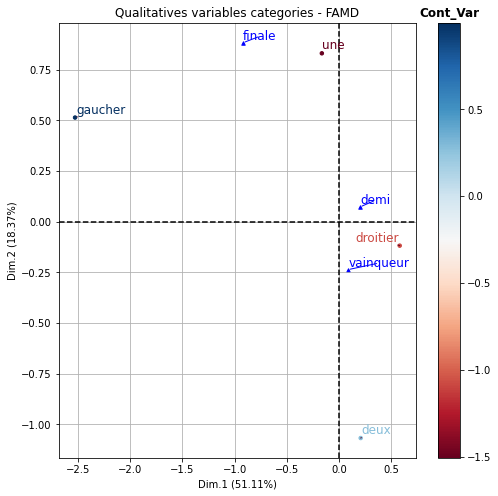

In [22]:
# Using numpy array
np.random.seed(123)
color_numpy = np.random.normal(size=len(afdm.mod_labels_))
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_mod(afdm,color=color_numpy,repel=True)
plt.show()

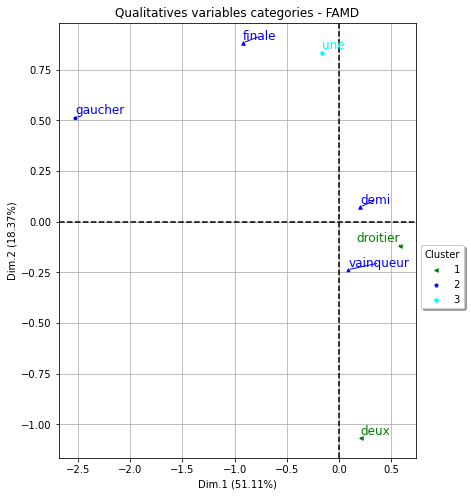

In [23]:
# Using Kmeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(afdm.mod_coord_)
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_mod(afdm,color=kmeans,repel=True)
plt.show()

## Variables Factor Map - FAMD

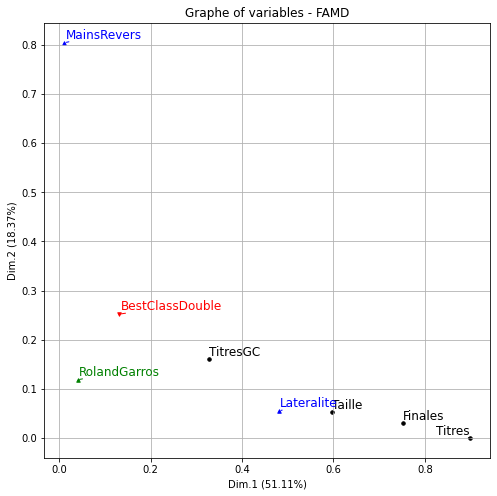

In [24]:
from scientisttools.pyplot import plot_famd_var
fig, axe = plt.subplots(figsize=(8,8))
plot_famd_var(afdm,repel=True)
plt.show()

## PlotFAMD

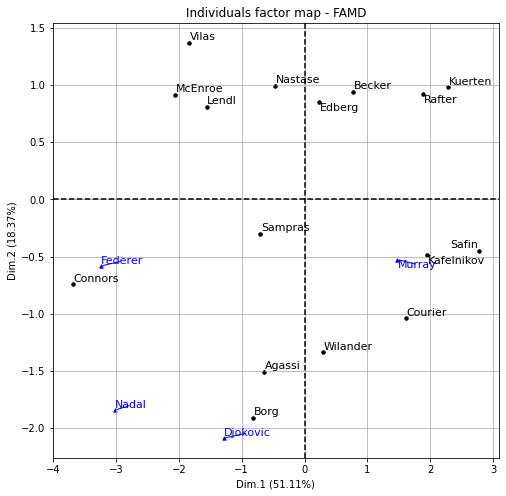

In [25]:
# Individuals Factor Map - FAMD
from scientisttools.pyplot import plotFAMD
fig, axe = plt.subplots(figsize=(8,8))
plotFAMD(afdm,choice="ind",repel=True)
plt.show()

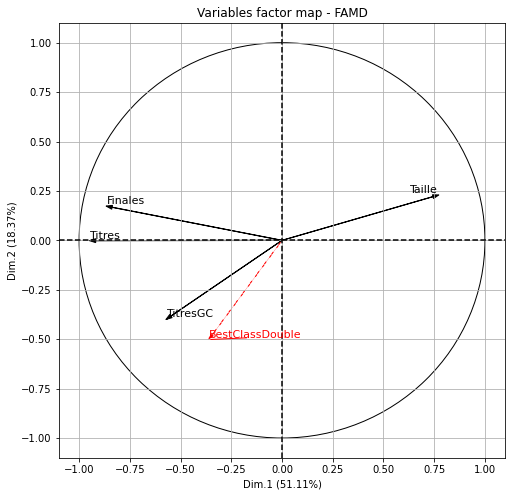

In [26]:
# Continuous variables Factor Map - FAMD
fig, axe = plt.subplots(figsize=(8,8))
plotFAMD(afdm,choice="col",repel=True)
plt.show()

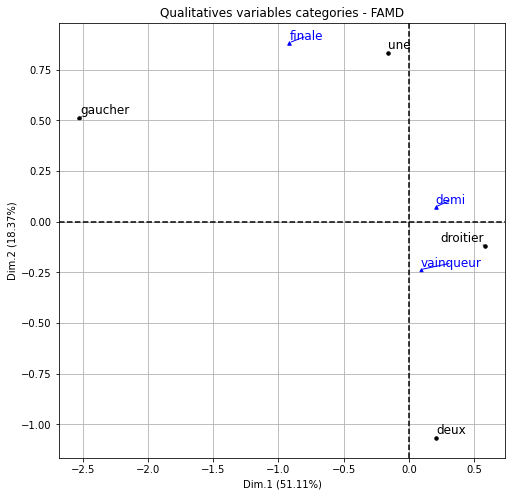

In [27]:
#Variables/categories Factor Map - FAMD
fig, axe = plt.subplots(figsize=(8,8))
plotFAMD(afdm,choice="mod",repel=True)
plt.show()

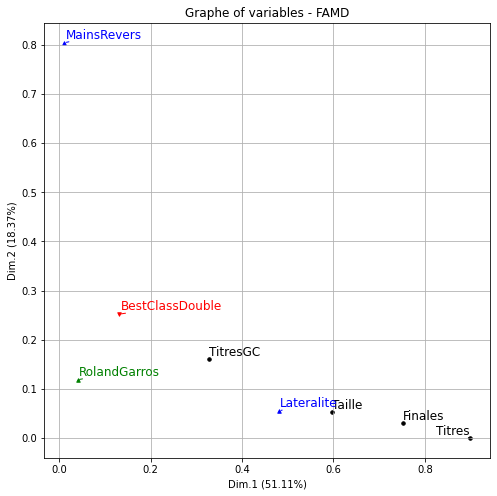

In [28]:
# Graphe of variables - FAMD
fig, axe = plt.subplots(figsize=(8,8))
plotFAMD(afdm,choice="var",repel=True)
plt.show()

# Contributions

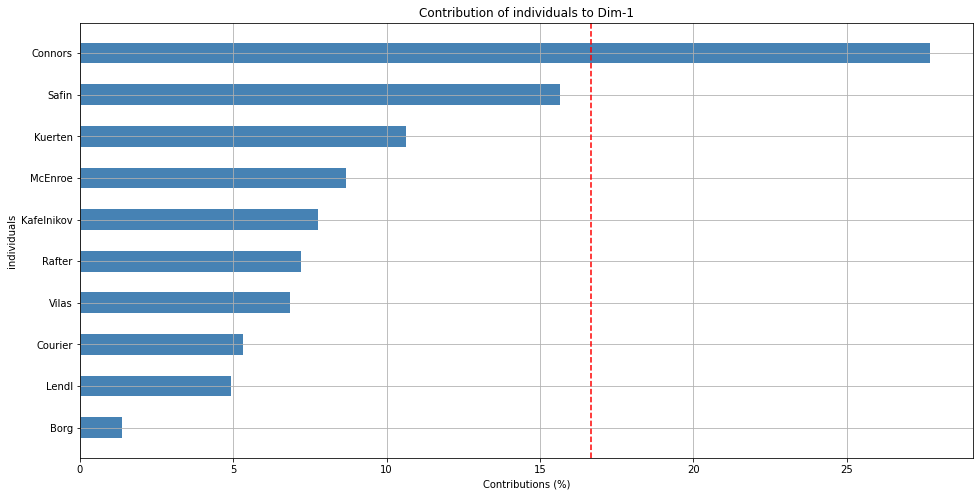

In [29]:
from scientisttools.pyplot import plot_contrib
fig, axe = plt.subplots(figsize=(16,8))
plot_contrib(afdm,choice="ind",ax=axe)
plt.show()

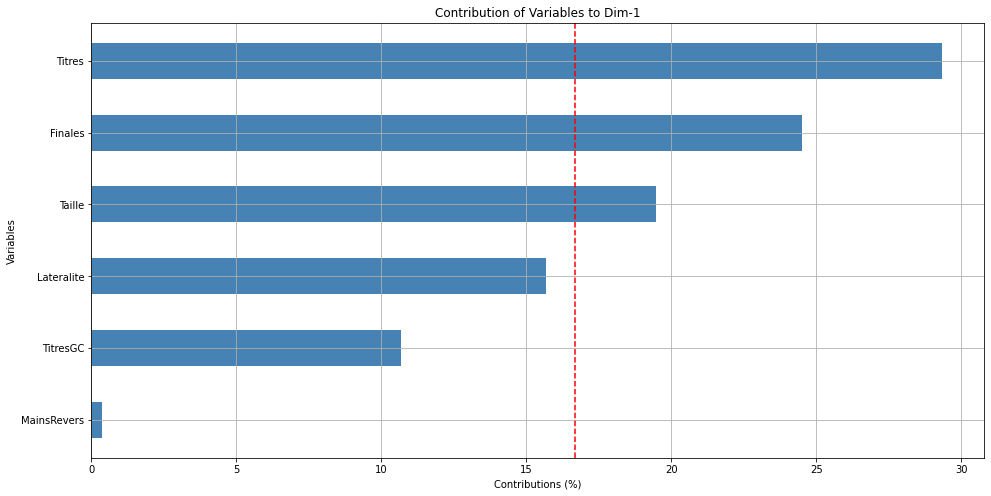

In [30]:
fig, axe = plt.subplots(figsize=(16,8))
plot_contrib(afdm,choice="var",ax=axe)
plt.show()

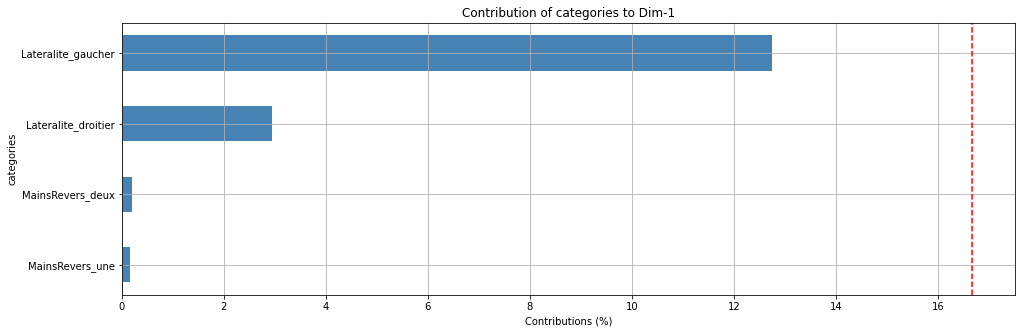

In [31]:
fig, axe = plt.subplots(figsize=(16,5))
plot_contrib(afdm,choice="mod",ax=axe)
plt.show()

## Cos2

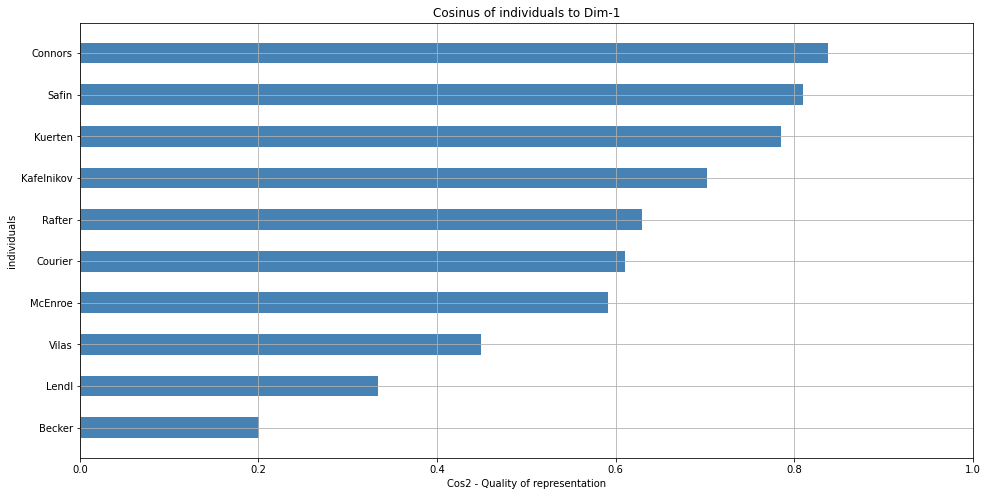

In [32]:
from scientisttools.pyplot import plot_cosines
fig, axe = plt.subplots(figsize=(16,8))
plot_cosines(afdm,choice="ind",ax=axe)
plt.show()

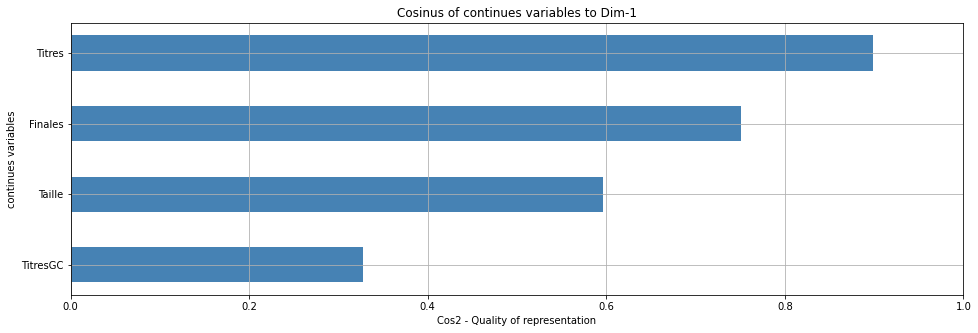

In [33]:
fig, axe = plt.subplots(figsize=(16,5))
plot_cosines(afdm,choice="var",ax=axe)
plt.show()

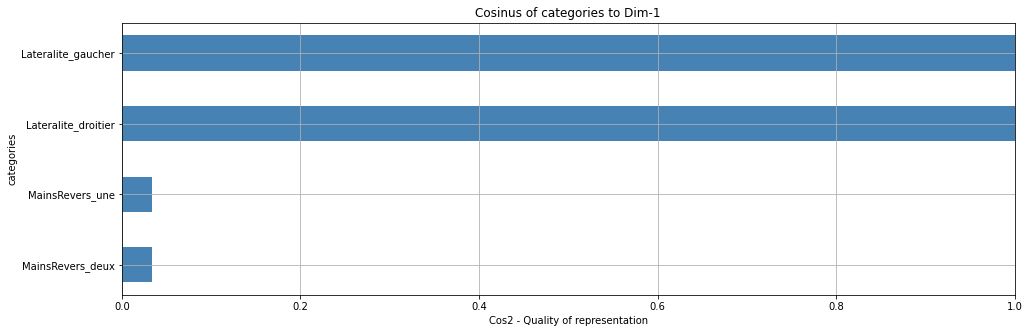

In [34]:
fig, axe = plt.subplots(figsize=(16,5))
plot_cosines(afdm,choice="mod",ax=axe)
plt.show()

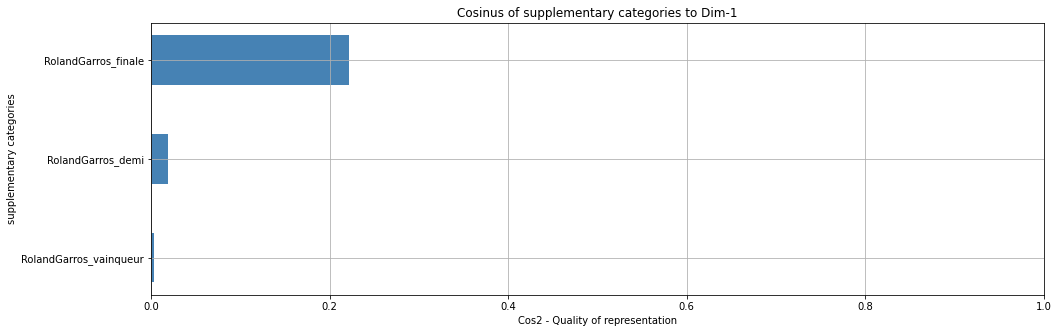

In [35]:
fig, axe = plt.subplots(figsize=(16,5))
plot_cosines(afdm,choice="quali_sup",ax=axe)
plt.show()